# Lecture 29: Nested Sampling

In this lecture, we will discuss the nested sampling algorithm. Nested sampling is a method that can be used to estimate the partition function of a chemical system.

## Lecture Objectives

By the end of this lecture, you will be able to:

- Explain the nested sampling algorithm.
- Implement the nested sampling algorithm to estimate the partition function of a simple chemical system.

## Partition Function

In the lecture on statistical thermodynamics, we discussed the partition function of a chemical system. The partition function is a sum over all possible states of the system, weighted by the Boltzmann factor. The partition function of a classical system is given by:

$$
Z = \int e^{-\beta H(\mathbf{q}, \mathbf{p})} d\mathbf{q} d\mathbf{p}
$$

where $H(\mathbf{q}, \mathbf{p})$ is the Hamiltonian of the system, $\mathbf{q}$ are the positions of the particles, $\mathbf{p}$ are the momenta of the particles, and $\beta = 1/kT$ is the inverse temperature.

## Configuration Integral

The integral over the momenta can be performed analytically, leading to:

$$
Z = \frac{1}{N! h^{3N}} \left( \frac{2\pi m}{\beta} \right)^{3N/2} \int e^{-\beta V(\mathbf{q})} d\mathbf{q}
$$

where $N$ is the number of particles, $h$ is the Planck constant, $m$ is the mass of the particles, and $V(\mathbf{q})$ is the potential energy of the system. The integral over the positions is known as the configuration integral.

## Nested Sampling

The configuration integral is a high-dimensional integral, which can be difficult to compute. The basic idea behind nested sampling is to transform the high-dimensional integral into a one-dimensional integral, which can be computed using Monte Carlo methods:

$$
Z_{\text{config}} = \int_{-\infty}^{\infty} e^{-\beta E} g(E) dE
$$

where $E$ is the energy of the system, and $g(E)$ is the density of states at energy $E$. $Z_{\text{config}}$ can also be written as:

$$
Z_{\text{config}} = \int_{0}^{\infty} e^{-\beta E(\chi)} d\chi \approx \sum_{i=1}^{M} e^{-\beta E(\chi_i)} \Delta \chi_i
$$

where $\chi$ is the cumulative density of states, and $M$ is the number of points used to estimate the integral.

```{note}
The cumulative density of states $\chi$ is defined as:

$$
\chi(E) = \int_{0}^{E} g(E') dE'
$$

The cumulative density of states is a monotonically increasing function of energy because as the energy increases, the number of accessible states increases.

Consider an anharmonic oscillator. The number of accessible states is lower at lower energies because the oscillator does not have enough energy to sample past the potential energy minimum. As the energy increases, the number of accessible states increases because the oscillator can sample past the potential energy minimum. At very high energies, the number of accessible states increases more quickly because the oscillator can sample dissociation.
```

## Nested Sampling Algorithm

````{margin}
```{note}
An infinite cumulative density of states corresponds to a system that can sample all possible states. A cumulative density of states of zero corresponds to a system that is stuck in a single state.
```
````

The nested sampling algorithm is a Monte Carlo method that can be used to estimate the configuration integral by carrying out the sum over the cumulative density of states from $\infty$ to $0$. The algorithm proceeds as follows:

1. Create an initial set of $K$ configurations that uniformly sample the configuration space. Each configuration is called a "live point" or "walker". The set of live points or walkers is called the "live set".
2. Compute the energy of each live point and sort the live points by energy.
3. Cull the live point with the highest energy and replace it with a new live point that is sampled from the uniform distribution bounded by the energy of the culled live point.
4. Repeat steps 2 and 3 until the change in the energy of the culled live point is less than a specified tolerance.

The partition function can be estimated as:

$$
Z = \sum_{i=1}^{M} e^{-\beta E(\chi_i)} \Delta \chi_i
$$

where $M$ is the number of iterations of the nested sampling algorithm. $\Delta \chi_i$ is the difference in the cumulative density of states between the $i$-th and $(i-1)$-th iteration:

$$
\Delta \chi_i = \chi_{i-1} - \chi_i = \frac{1}{K + 1} \left( \frac{K}{K+1} \right)^{i}
$$

## Example: Harmonic Oscillator

Let's consider a simple example of a harmonic oscillator. The potential energy of a harmonic oscillator is given by:

$$
V(x) = \frac{1}{2} k x^2
$$

where $k$ is the force constant of the oscillator. The energy of the oscillator is given by:

$$
E = \frac{1}{2} k x^2
$$

Let's implement the nested sampling algorithm to estimate the partition function of a harmonic oscillator.

First, we need to import the necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

Next, we define the potential energy of the harmonic oscillator:

In [2]:
def potential_energy(x, k):
    return 0.5 * k * x**2

We also define the number of live points and the force constant of the oscillator:

In [3]:
K = 100
k = 1.0  # force constant of the oscillator in eV/A^2

We create an initial set of live points that uniformly sample the configuration space:

In [4]:
x_max = 1.0
live_points = np.random.uniform(-x_max, x_max, K)

We carry out the nested sampling algorithm:

In [5]:
n_iterations = 1000
energies = potential_energy(live_points, k)
energies_of_culled_live_points = []

for i in range(n_iterations):
    # Get the index of the live point with the highest energy
    idx = np.argmax(energies)

    # Append the energy of the culled live point to the list
    energies_of_culled_live_points.append(energies[idx])

    # Replace the culled live point with a new live point sampled from the uniform distribution bounded by the energy of the culled live point
    while True:
        new_live_point = np.random.uniform(-x_max, x_max)
        new_energy = potential_energy(new_live_point, k)
        if new_energy < energies[idx]:
            live_points[idx] = new_live_point
            energies[idx] = new_energy
            break

## Analysis

Let's plot the energy of the culled live points as a function of the iteration number:

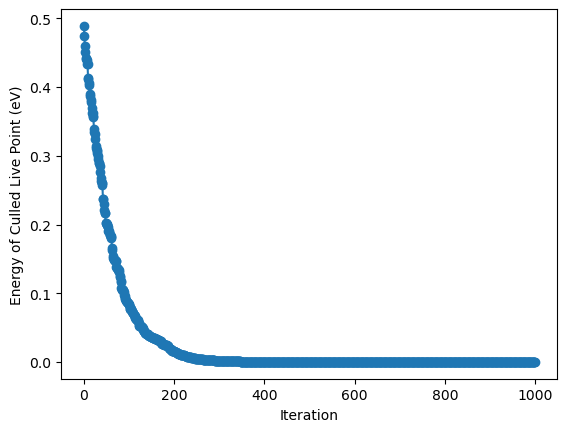

In [6]:
plt.plot(energies_of_culled_live_points, 'o-')
plt.xlabel('Iteration')
plt.ylabel('Energy of Culled Live Point (eV)')
plt.show()

The plot shows that the energy of the culled live points decreases with the iteration number.

We can estimate the partition function of the harmonic oscillator as a function of temperature:

In [7]:
k_B = 8.617333262E-5  # Boltzmann constant in eV/K

def partition_function(energies, beta, chi_0):
    Z = 0.0
    for i, energy in enumerate(energies):
        delta_chi = (1 / (K + 1)) * ((K / (K + 1)) ** i)
        Z += np.exp(-beta * energy) * delta_chi
    return Z

temperatures = np.linspace(0.1, 10.0, 100)
partition_functions = []
chi_0 = 2.0 * x_max

for T in temperatures:
    beta = 1 / (k_B * T)  # Boltzmann constant in eV/K
    partition_functions.append(partition_function(energies_of_culled_live_points, beta, chi_0) * 2)

Let's plot the partition function of the harmonic oscillator as a function of temperature and compare it to the exact partition function:

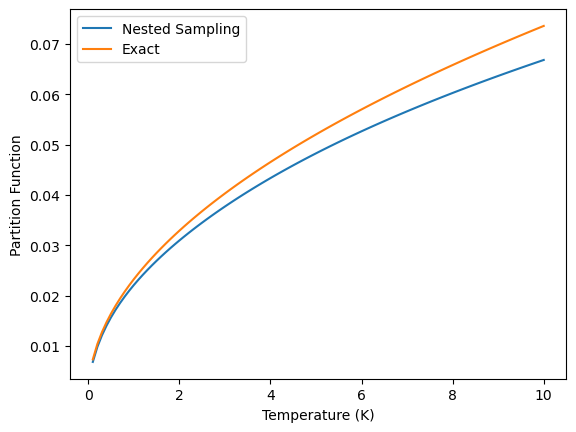

In [8]:
from scipy.special import erf

def exact_partition_function(temperature, limit):
    return np.sqrt(2 * np.pi * k_B * temperature) * erf(limit / np.sqrt(2 * k_B * temperature))

exact_partition_functions = [exact_partition_function(T, x_max) for T in temperatures]

plt.plot(temperatures, partition_functions, label='Nested Sampling')
plt.plot(temperatures, exact_partition_functions, label='Exact')
plt.xlabel('Temperature (K)')
plt.ylabel('Partition Function')
plt.legend()
plt.show()

The plot shows that the partition function estimated using the nested sampling algorithm is in good agreement with the exact partition function. Since the partition function is contains all the information needed to calculate the thermodynamic properties of the system, the nested sampling algorithm can be used to estimate the thermodynamic properties of a chemical system.

## Summary

In this lecture, we discussed the nested sampling algorithm. Nested sampling is a method that can be used to estimate the partition function and thermodynamic properties of a chemical system.